# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [140]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

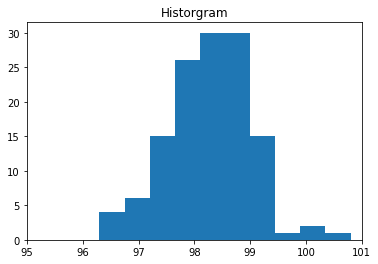

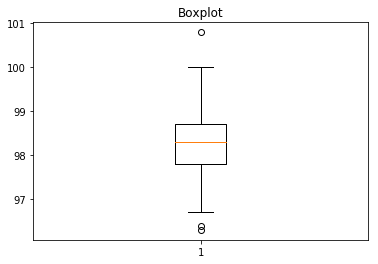

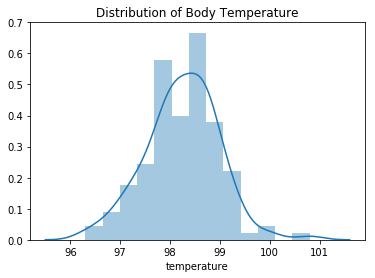

In [141]:
# Plot temperatures
_ = plt.hist(df.temperature)
plt.xlim(95, 101)
plt.title('Historgram')
plt.show()

_ = plt.boxplot(df.temperature)
plt.title('Boxplot')
plt.show()

sns.distplot(df.temperature)
plt.title('Distribution of Body Temperature')
plt.show()

### 2. Is the sample size large? Are the observations independent?

Yes, sample size is large since it is greater than 30. Yes, the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?

In [142]:
bt_mean = np.mean(df.temperature)
bt_std = np.std(df.temperature)
print(bt_mean)
print(bt_std)


98.24923076923078
0.7303577789050377


**Bootstrap Hypothesis Test**

In [144]:
# bootstrap functions

def bs_rep(data, function):
    """Return replicate of a resampled data array."""
    
    return function(np.random.choice(data, size=len(data)))

def draw_bs_rep(data, function, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_rep
    bs_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_reps[i] = bs_rep(data, function)

    return bs_reps

In [145]:
# Seed the random number generator:
np.random.seed(16)

# Make an array of translated temperatures:
translated_temps = df.temperature - bt_mean + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_reps = draw_bs_rep(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_reps <= bt_mean) / len(translated_reps)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


In [146]:
# One sample ttest
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

A one sample t-test is the best choice since we are comparing one data set to one value.

In [147]:
# z-statistic

# standard error of mean
sem = bt_std/np.sqrt(len(df.temperature))

# z-statistic
z = (bt_mean - 98.6) / sem

# p-value
p = stats.norm.cdf(z) * 2

print('z-statistic:', z, 'p-value:', p)

z-statistic: -5.475925202078116 p-value: 4.3523151658821886e-08


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [148]:
np.random.seed(16)

# Random sample of 10 from temperature
sample = np.random.choice(df.temperature, size=10)
sample

array([97.9, 98.9, 97.4, 97.2, 96.3, 98. , 98.4, 97.7, 98.2, 98.8])

In [149]:
# one sample ttest
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-2.913603090579074, pvalue=0.01721003197564439)

In [150]:
# z-statistic
z_1 = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# p-value
p_1 = stats.norm.cdf(z_1) * 2

print('z-statistic:', z_1, 'p-value:', p_1)

z-statistic: -3.0712073213119178 p-value: 0.002131950624444718


In [151]:
# calc 95% CI
print((stats.t.ppf(q=0.025, df=9)), (stats.t.ppf(q=0.975, df=9)))

# calc 99% CI
print((stats.t.ppf(q=0.0005, df=9)), (stats.t.ppf(q=0.9995, df=9)))


-2.262157162740992 2.2621571627409915
-4.780912585933472 4.7809125859335495


Looking at the p-values for the t and z statistic they both reject the null hypothesis. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [152]:
from scipy.stats import norm

# calc 99.95% prediction interval
PI = stats.norm.interval(0.9995, loc=bt_mean, scale=bt_std)
print('99% PI:', PI)

# z value at 99% CI
z_value = norm.ppf(0.9995)
z_value

99% PI: (95.70703325284298, 100.79142828561858)


3.2905267314919255

In [153]:
# calc margin of error
moe = z_value * bt_std
print('SEM:', sem)
print('MOE:', moe)

SEM: 0.06405661469519336
MOE: 2.403261795040096


In [154]:
# Calc 95% CI
PI_1 = np.array([bt_mean - moe, bt_mean + moe])
print('95% PI:', PI_1)

95% PI: [ 95.84596897 100.65249256]


In [155]:
# Bootstrap approach
np.random.seed(16)

replicates = draw_bs_rep(df.temperature, np.mean, size=10000)

# 99.9% CI
CI_1 = np.percentile(replicates, [0.05, 99.95])
print('99.9% CI:', CI_1)

99.9% CI: [98.02307615 98.45923423]


The prediction interval shows a range of 95 to 100 and the CI shows a range of 98.02 to 98.45. Abnormal temperatures are possbile 95 would be considered hypothermia and 100 would be considered a fever.

### 6. Is there a significant difference between males and females in normal temperature?

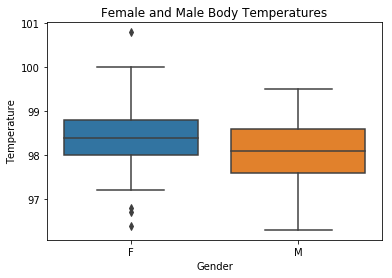

In [156]:
# Plot male and female temperatures
sns.boxplot(x='gender', y='temperature', data=df)
plt.xlabel('Gender')
plt.ylabel('Temperature')
plt.title('Female and Male Body Temperatures')
plt.show()

In [157]:
# filter temp by gender
male_temp = df.temperature.loc[df.gender == 'M']
female_temp = df.temperature.loc[df.gender == 'F']

# sample means
mean_male = np.mean(male_temp)
mean_female = np.mean(female_temp)

print('Male Temperature Mean:', mean_male)
print('Female Temperature Mean:', mean_female)

Male Temperature Mean: 98.1046153846154
Female Temperature Mean: 98.39384615384613


Sample data show there is a difference between male and female body temperatures.

**Null Hypothesis:** There is not a significant difference between female and male body temperatures.

In [158]:
# Define permutation functions

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [159]:
# Seed the random number generator:
np.random.seed(16)


# Compute difference of means:
empirical_difference = difference_of_means(female_temp, male_temp)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(female_temp, male_temp, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print(('Difference of Means', empirical_difference),('p-value =', p))


('Difference of Means', 0.289230769230727) ('p-value =', 0.013)


The null hypothesis is rejected with a p-value of 0.013.

In [160]:
# two sample ttest
stats.ttest_ind(female_temp, male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

In [161]:
# confidence interval
print((stats.t.ppf(q=0.025, df=64)), (stats.t.ppf(q=0.975, df=64)))

-1.9977296536259739 1.9977296536259734


The two sample t-test has returned a p-value of 0.024 therefore the null hypothesis is rejected. The results show there is a difference between the body temperatures of men and women but it is not extremely large.